In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'distel(roberta)-english'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

my hea aches for the friends and family of dead and injured in orlando...senseless #orlandohorror   #prayers 0
can't wait to get moved into our new home this weekend ð¡ð« and for a week off ð     @user â¤ï¸â¤ï¸â¤ï¸ 0
#cleaning #spaces. creating   #faces.  0
on route to ally pally #boxcup @user   @user @user @user  0
Please follow https://t.co/rC6EFF0AVH 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

my hea aches for the friends and family of dead and injured in orlandosenseless 0
cant wait to get moved into our new home this weekend ð¡ð« and for a week off ð â¤ï¸â¤ï¸â¤ï¸ 0
creating 0
on route to ally pally 0
please follow 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 10/50
----------


Training Progress: 100%|██████████| 309/309 [01:38<00:00,  3.13it/s, loss=0.0859]


Train loss 0.1145384754672116 accuracy 0.956259732367798
Validation loss 0.06352168126303015 accuracy 0.9792252183820738
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.9792252183820738
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 309/309 [01:37<00:00,  3.15it/s, loss=0.0868]


Train loss 0.05758233537782936 accuracy 0.9801364746990087
Validation loss 0.06097674085894256 accuracy 0.980858336498291
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.980858336498291
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 309/309 [01:38<00:00,  3.13it/s, loss=0.0648] 


Train loss 0.04748092967456261 accuracy 0.9835926521414374
Validation loss 0.06117756584731555 accuracy 0.981466008355488
Model and tokenizer saved at epoch 12
Checkpoint saved: Improved validation accuracy at epoch 12: 0.981466008355488
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.10it/s, loss=0.0637] 


Train loss 0.040039284962521786 accuracy 0.9861626302396536
Validation loss 0.06332274640060383 accuracy 0.9813140903911888
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 13
Epoch 14/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.12it/s, loss=0.0621] 


Train loss 0.03303211575229336 accuracy 0.9886186684221854
Validation loss 0.07466911324480711 accuracy 0.9815039878465629
Model and tokenizer saved at epoch 14
Checkpoint saved: Improved validation accuracy at epoch 14: 0.9815039878465629
Metrics logged at epoch 14
Epoch 15/50
----------


Training Progress: 100%|██████████| 309/309 [01:38<00:00,  3.14it/s, loss=0.0569] 


Train loss 0.026809816743009106 accuracy 0.9910873665953487
Validation loss 0.07518625406557423 accuracy 0.9823395366502089
Model and tokenizer saved at epoch 15
Checkpoint saved: Improved validation accuracy at epoch 15: 0.9823395366502089
Metrics logged at epoch 15
Epoch 16/50
----------


Training Progress: 100%|██████████| 309/309 [01:42<00:00,  3.02it/s, loss=0.0413] 


Train loss 0.023942517710044908 accuracy 0.99188494600514
Validation loss 0.08559764233006399 accuracy 0.9805165210786176
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 16
Epoch 17/50
----------


Training Progress: 100%|██████████| 309/309 [01:41<00:00,  3.04it/s, loss=0.034]   


Train loss 0.019693153321104044 accuracy 0.993138285077669
Validation loss 0.08742934620478054 accuracy 0.9818458032662363
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 17
Epoch 18/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.08it/s, loss=0.0179]  


Train loss 0.01608157841611916 accuracy 0.9944296041220929
Validation loss 0.09170433264836055 accuracy 0.9818837827573111
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 18
Epoch 19/50
----------


Training Progress: 100%|██████████| 309/309 [01:41<00:00,  3.06it/s, loss=0.0368]  


Train loss 0.013643884613339919 accuracy 0.9951765435693577
Validation loss 0.08864900599984289 accuracy 0.98211165970376
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 19
Epoch 20/50
----------


Training Progress: 100%|██████████| 309/309 [01:41<00:00,  3.05it/s, loss=0.0122]  


Train loss 0.012572551520826132 accuracy 0.9956069832508324
Validation loss 0.0961444709112063 accuracy 0.9804405620964679
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


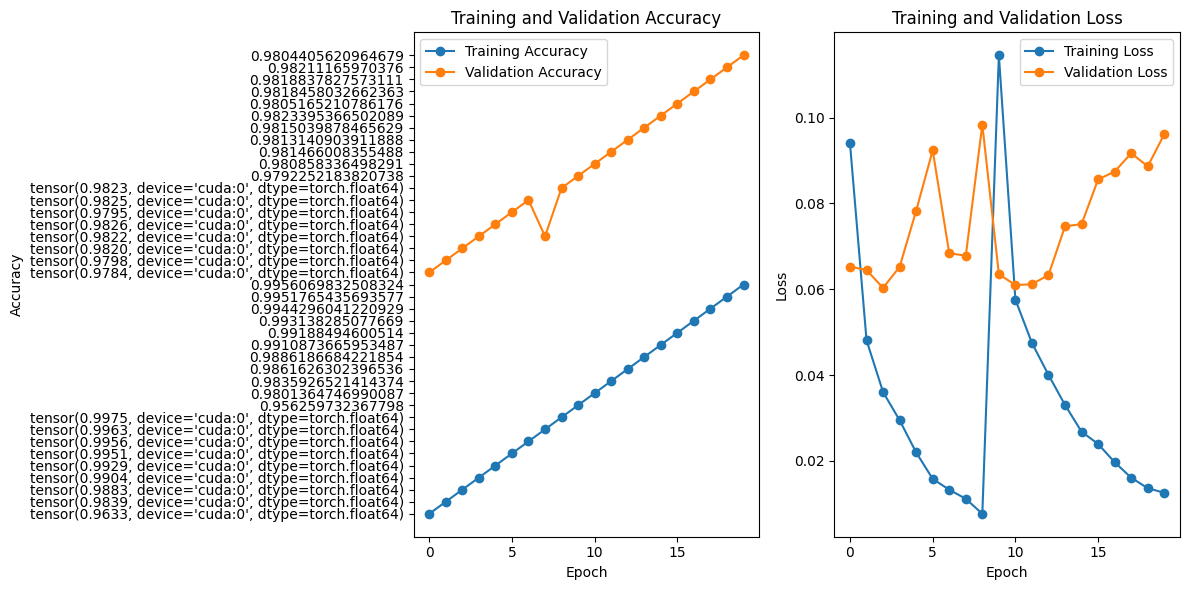

In [9]:
hlp.plot_history(history)

In [ ]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

saved_model_path = 'G:\My Drive\Hate Speech_Multilingual\Code\Model training\Hate_VS_Non-Hate\saved_models\distil(roberta)-english'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(f'{saved_model_path}\\tokenizer')
model = BertForSequenceClassification.from_pretrained(f'{saved_model_path}\model_epoch_5', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.981693885301937 Test Loss: 0.0882010337381253


Accuracy: 0.98
F1 Score: 0.98
Precision: 0.99
Recall: 0.97

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.98      0.99      0.98     15856
        Hate       0.99      0.97      0.98     10474

    accuracy                           0.98     26330
   macro avg       0.98      0.98      0.98     26330
weighted avg       0.98      0.98      0.98     26330



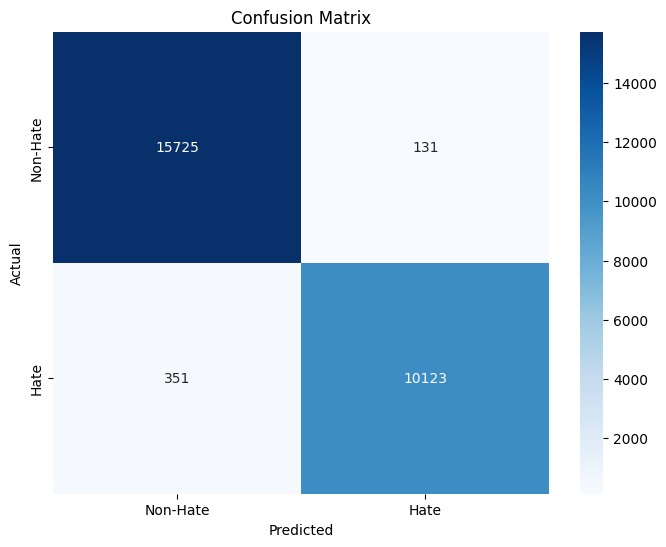

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 1.00
